## We have 3 datasets in the cell_data folder involving cell phone usage. We need to combine them to find out which cell phone models have the most average data usage per month


### 1) Merge the user\_device and user\_usage tables together

#### Try using a left, right, and inner join (or merge) on the two tables, then check the differences in the resultant dataframe's shape. Why do you think you get each result? (Be sure to keep which dataframe is on the left and right consistent)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cd cell_data

/Users/mindy/Documents/flatiron_school/code_sample/dc_ds_06_03_19/module_2/morning_warmup/week_1/cell_data


In [7]:
ls

android_devices.csv  user_device.csv      user_usage.csv


In [3]:
android = pd.read_csv('cell_data/android_devices.csv')
android.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [4]:
user = pd.read_csv('cell_data/user_device.csv')
user.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [5]:
usage = pd.read_csv('cell_data/user_usage.csv')
usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [7]:
# left join 
merge_left = user.merge(usage, on ='use_id', how = 'left')
merge_left.head()

,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,22782,26980,ios,10.2,"iPhone7,2",2,NaN,NaN,NaN
1,22783,29628,android,6.0,Nexus 5,3,NaN,NaN,NaN
2,22784,28473,android,5.1,SM-G903F,1,NaN,NaN,NaN
3,22785,15200,ios,10.2,"iPhone7,2",3,NaN,NaN,NaN
4,22786,28239,android,6.0,ONE E1003,1,NaN,NaN,NaN


In [9]:
merge_right = user.merge(usage, on = 'use_id', how = 'right')
merge_right.head()

,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,22787,12921.0,android,4.3,GT-I9505,1.0,21.97,4.82,1557.33
1,22788,28714.0,android,6.0,SM-G930F,1.0,1710.08,136.88,7267.55
2,22789,28714.0,android,6.0,SM-G930F,1.0,1710.08,136.88,7267.55
3,22790,29592.0,android,5.1,D2303,1.0,94.46,35.17,519.12
4,22792,28217.0,android,5.1,SM-G361F,1.0,71.59,79.26,1557.33


In [10]:
merge_inner = user.merge(usage, on = 'use_id', how = 'inner')
merge_inner.head()

,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,22787,12921,android,4.3,GT-I9505,1,21.97,4.82,1557.33
1,22788,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55
2,22789,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55
3,22790,29592,android,5.1,D2303,1,94.46,35.17,519.12
4,22792,28217,android,5.1,SM-G361F,1,71.59,79.26,1557.33


### 2) We want to analyze our user\_usage information (outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, monthly\_mb) across each phone model ('Marketing Name' column in android\_devices.csv) and each brand ('Retail Branding' column in android\_devices.csv). Merge the dataframes appropriately to make this analysis possible. (Note: the 'device' column in user_device.csv has the same information as 'Model' in android\_devices.csv) 



In [22]:
merge_inner.head()

,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,22787,12921,android,4.3,GT-I9505,1,21.97,4.82,1557.33
1,22788,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55
2,22789,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55
3,22790,29592,android,5.1,D2303,1,94.46,35.17,519.12
4,22792,28217,android,5.1,SM-G361F,1,71.59,79.26,1557.33


In [23]:
android_merge = merge_inner.merge(android, on = 'device', how = 'inner')
android_merge.head()

,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,Retail Branding,Marketing Name,Model
0,22790,29592,android,5.1,D2303,1,94.46,35.17,519.12,Sony,Xperia M2,D2303
1,22854,29592,android,5.1,D2303,1,99.23,35.58,519.12,Sony,Xperia M2,D2303
2,22806,21615,android,6.0,A0001,1,283.30,107.47,15573.33,OnePlus,OnePlus One,A0001
3,22806,21615,android,6.0,A0001,1,283.30,107.47,15573.33,OnePlus,OnePlus One,One
4,22839,29655,android,6.0,A0001,1,57.49,16.73,15573.33,OnePlus,OnePlus One,A0001


In [26]:
android_merge.groupby(['Marketing Name', 'Retail Branding'])[
    ['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']].describe()

outgoing_mins_per_month            \
                                                    count      mean   
Marketing Name    Retail Branding                                     
OnePlus One       OnePlus                             4.0  170.3950   
X11               Lava                                2.0   60.6500   
Xperia M2         Sony                                2.0   96.8450   
Xperia XA         Sony                                4.0   46.2625   
Xperia Z          Sony                                1.0   92.5200   
Xperia Z1 Compact Sony                                2.0  146.4500   
Xperia Z3         Sony                                2.0  362.0100   
Xperia Z3 Compact Sony                                1.0  244.8800   
Xperia Z5         Sony                                1.0  135.0900   

                                                                          \
                                          std     min       25%      50%   
Marketing Name    Retail Branding                                          
OnePlus One       OnePlus          130.371464   57.49   57.4900  170.395   
X11               Lava               0.806102   60.08   60.3650   60.650   
Xperia M2         Sony               3.372899   94.46   95.6525   96.845   
Xperia XA         Sony               6.465000   43.03   43.0300   43.030   
Xperia Z          Sony                    NaN   92.52   92.5200   92.520   
Xperia Z1 Compact Sony               0.000000  146.45  146.4500  146.450   
Xperia Z3         Sony               0.000000  362.01  362.0100  362.010   
Xperia Z3 Compact Sony                    NaN  244.88  244.8800  244.880   
Xperia Z5         Sony                    NaN  135.09  135.0900  135.090   

                                                    outgoing_sms_per_month  \
                                        75%     max                  count   
Marketing Name    Retail Branding                                            
OnePlus One       OnePlus          283.3000  283.30                    4.0   
X11               Lava              60.9350   61.22                    2.0   
Xperia M2         Sony              98.0375   99.23                    2.0   
Xperia XA         Sony              46.2625   55.96                    4.0   
Xperia Z          Sony              92.5200   92.52                    1.0   
Xperia Z1 Compact Sony             146.4500  146.45                    2.0   
Xperia Z3         Sony             362.0100  362.01                    2.0   
Xperia Z3 Compact Sony             244.8800  244.88                    1.0   
Xperia Z5         Sony             135.0900  135.09                    1.0   

                                              ...                       \
                                      mean    ...          75%     max   
Marketing Name    Retail Branding             ...                        
OnePlus One       OnePlus           62.100    ...     107.4700  107.47   
X11               Lava             261.900    ...     262.1850  262.47   
Xperia M2         Sony              35.375    ...      35.4775   35.58   
Xperia XA         Sony               0.415    ...       0.4700    0.47   
Xperia Z          Sony             162.390    ...     162.3900  162.39   
Xperia Z1 Compact Sony              48.670    ...      48.6700   48.67   
Xperia Z3         Sony              14.190    ...      14.1900   14.19   
Xperia Z3 Compact Sony             105.950    ...     105.9500  105.95   
Xperia Z5         Sony              42.020    ...      42.0200   42.02   

                                  monthly_mb                           \
                                       count      mean  std       min   
Marketing Name    Retail Branding                                       
OnePlus One       OnePlus                4.0  15573.33  0.0  15573.33   
X11               Lava                   2.0  12458.67  0.0  12458.67   
Xperia M2         Sony                   2.0    519.12  0.0    519.12   
Xper

### 3) Create 2 dataframes showing the following:

#### Dataframe 1) Index should be the brand, and your columns should show the mean of the following: outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, and monthly\_mb. It should be sorted from high to low by monthly_mb.

##### Plot the monthly_mb information by brand


#### Dataframe 2) Index should be the phone model, and your columns should show the sum of the following: outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, and monthly\_mb. It should be sorted from high to low by outgoing\_sms\_per\_month

##### Plot the outgoing\_sms\_per_month by phone model

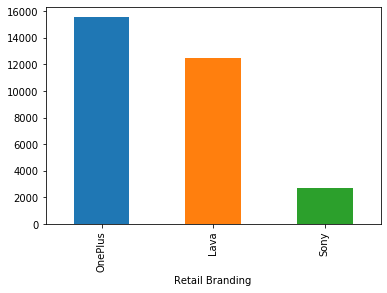

In [47]:
df1 = android_merge.groupby('Retail Branding')[
    'outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb'].mean().sort_values('monthly_mb', ascending=False)
df1['monthly_mb'].plot.bar()

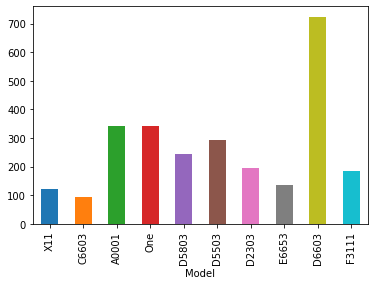

In [48]:
df2 = android_merge.groupby('Model')[
    'outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb','Model'].sum().sort_values('outgoing_sms_per_month', ascending=False)
df2.outgoing_mins_per_month.plot.bar()